<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo montecarlo \\
Muestreo de importancia
$g = \int_{0}^{1} \cos\left(\frac{\pi x}{2}\right) \, dx$ \\
con las series de Taylor: $y = \frac{3}{2} \left( 1 - x^2 \right)$


In [32]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

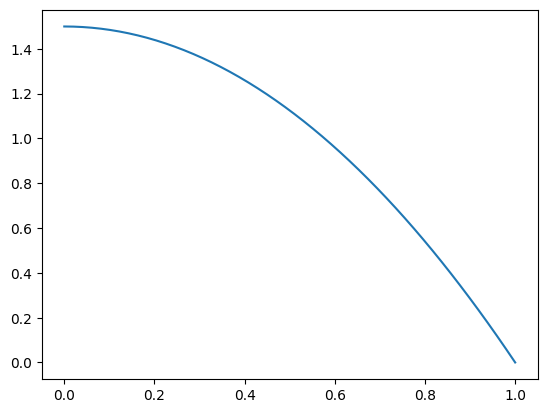

In [33]:
x = np.linspace(0, 1, 50)
y= 3/2*(1-x**2)
plt.plot(x,y)
plt.show()

In [34]:
#El siguiente código muestra histograma del muestreo de importancia
def funcion(n=100):
    list=[]
    for i in range(n):
        y=rd.uniform(0,1)
        U=rd.uniform(0,1)
        f=3/2*(1-y**2)
        c=3/2
        if f/c>=U: #condicion para regresar x, paso 3
         x=y
         list.append(x)
    return list

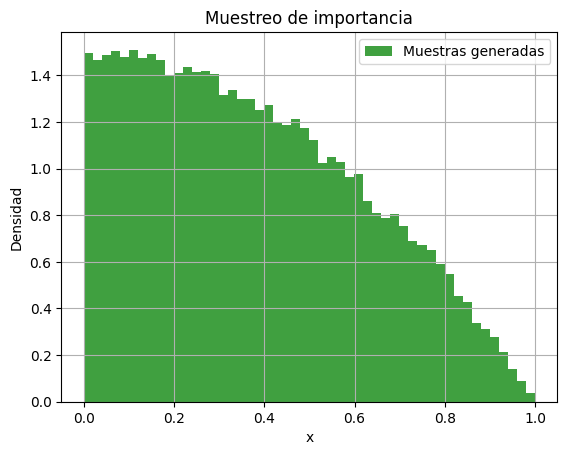

In [35]:
histograma = funcion(100000)
# Crear el histograma
plt.hist(histograma, bins=50, density=True, alpha=0.75, color='green', label="Muestras generadas")

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Muestreo de importancia')
plt.legend()
plt.grid(True)
plt.show()



In [36]:
#El siguiente código muestra histograma de media muestral
def muestreo_aleatorio(n=100):
    return [rd.uniform(0, 1) for _ in range(n)]

In [37]:
def muestreo_aceptacion_rechazo(n=100):
    lista = []
    for i in range(n):
        y = rd.uniform(0, 1)
        U = rd.uniform(0, 1)
        f = 3/2 * (1 - y**2)
        c = 3/2
        if f/c >= U:
            lista.append(y)
    return lista

In [38]:
# Comparar

muestra = 100000
resultado = []

for x in [funcion, muestreo_aleatorio, muestreo_aceptacion_rechazo]:
    inicio = time.time()
    valor = x(muestra)
    execution_time = time.time() - inicio
    resultado.append({
        'Método': x.__name__,
        'Tiempo (s)': round(execution_time, 4),
        'Varianza': round(np.var(valor), 4)
    })


In [39]:

# Crear un valorFrame para mostrar los resultados
resultado = pd.DataFrame(resultado)

# Mostrar la tabla
resultado

,Método,Tiempo (s),Varianza
0,funcion,0.0935,0.0590
1,muestreo_aleatorio,0.0329,0.0835
2,muestreo_aceptacion_rechazo,0.1002,0.0595
